<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorios N°01

## Objetivos del laboratorio

* Reforzar conceptos básicos de regresión lineal.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

# Parte1

<AxesSubplot:xlabel='x', ylabel='y'>

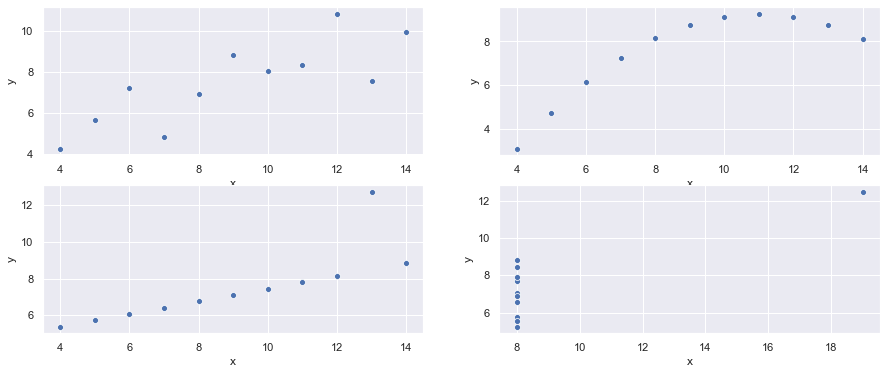

In [3]:
grupos=df.groupby('grupo')
plt.figure(figsize=(15,6))
g1=plt.subplot(2,2,1)
g2=plt.subplot(2,2,2)
g3=plt.subplot(2,2,3)
g4=plt.subplot(2,2,4)
sns.scatterplot(x='x', y='y', data=grupos.get_group('Grupo_1'), ax=g1)
sns.scatterplot(x='x', y='y', data=grupos.get_group('Grupo_2'), ax=g2)
sns.scatterplot(x='x', y='y', data=grupos.get_group('Grupo_3'), ax=g3)
sns.scatterplot(x='x', y='y', data=grupos.get_group('Grupo_4'), ax=g4)

Los grupos son MUY distintos entre si, de hecho algunos no tienen comportamiento lineal.

# Parte 2

In [4]:
df.groupby(['grupo']).describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
grupo                                                                     
Grupo_1  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
Grupo_2  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
Grupo_3  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
Grupo_4  11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
grupo                                              
Grupo_1  2.031568  4.26  6.315  7.58  8.57  10.84  
Grupo_2  2.031657  3.10  6.695  8.14  8.95   9.26  
Grupo_3  2.030424  5.39  6.250  7.11  7.98  12.74  
Grupo_4  2.030579  5.25  6.170  7.04  8.19  12.50

# Parte 3

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split


In [6]:
grupos=df.groupby('grupo')    # categorizo por grupo
X1=grupos.get_group('Grupo_1')[['x']]  #Genero un nuevo dataframe solo del grupo1, con los valores de la columna x
X2=grupos.get_group('Grupo_2')[['x']]  #Genero un nuevo dataframe solo del grupo2, con los valores de la columna x
X3=grupos.get_group('Grupo_3')[['x']]  #Genero un nuevo dataframe solo del grupo3, con los valores de la columna x
X4=grupos.get_group('Grupo_4')[['x']]  #Genero un nuevo dataframe solo del grupo4, con los valores de la columna x
y1=grupos.get_group('Grupo_1')['y']    #Genero una nueva serie solo del grupo1, con los valores de la columna y
y2=grupos.get_group('Grupo_2')['y']    #Genero una nueva serie solo del grupo2, con los valores de la columna y
y3=grupos.get_group('Grupo_3')['y']    #Genero una nueva serie solo del grupo3, con los valores de la columna y
y4=grupos.get_group('Grupo_4')['y']    #Genero una nueva serie solo del grupo4, con los valores de la columna y
#Separo los conjuntos anteriores en partes de prueba y testeo
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=77)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=77)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=77)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=77)
# importando el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

model_rl1 = LinearRegression() # Creando el modelo.
model_rl2 = LinearRegression() # Creando el modelo.
model_rl3 = LinearRegression() # Creando el modelo.
model_rl4 = LinearRegression() # Creando el modelo.
# ajustando el modelo
model_rl1.fit(X1_train, y1_train)
model_rl2.fit(X2_train, y2_train)
model_rl3.fit(X3_train, y3_train)
model_rl4.fit(X4_train, y4_train)
# Lista de coeficientes B para cada X_train de grupo 1

beta1_0 = round(model_rl1.intercept_,4)
beta1_1 = round(model_rl1.coef_[0],4)

print(f"El mejor ajuste lineal para el grupo 1 viene dado por la recta: \n\n     \
f(x) = {beta1_0} + {beta1_1}*x")
# Lista de coeficientes B para cada X_train de grupo 2

beta2_0 = round(model_rl2.intercept_,4)
beta2_1 = round(model_rl2.coef_[0],4)

print(f"El mejor ajuste lineal para el grupo 2 viene dado por la recta: \n\n     \
f(x) = {beta2_0} + {beta2_1}*x")
# Lista de coeficientes B para cada X_train de grupo 3

beta3_0 = round(model_rl3.intercept_,4)
beta3_1 = round(model_rl3.coef_[0],4)

print(f"El mejor ajuste lineal para el grupo 3 viene dado por la recta: \n\n     \
f(x) = {beta3_0} + {beta3_1}*x")
# Lista de coeficientes B para cada X_train de grupo 4

beta4_0 = round(model_rl4.intercept_,4)
beta4_1 = round(model_rl4.coef_[0],4)

print(f"El mejor ajuste lineal para el grupo 4 viene dado por la recta: \n\n     \
f(x) = {beta4_0} + {beta4_1}*x")


El mejor ajuste lineal para el grupo 1 viene dado por la recta: 

     f(x) = 2.6287 + 0.5419*x
El mejor ajuste lineal para el grupo 2 viene dado por la recta: 

     f(x) = 2.9306 + 0.5122*x
El mejor ajuste lineal para el grupo 3 viene dado por la recta: 

     f(x) = 4.0069 + 0.3453*x
El mejor ajuste lineal para el grupo 4 viene dado por la recta: 

     f(x) = 3.6017 + 0.4683*x


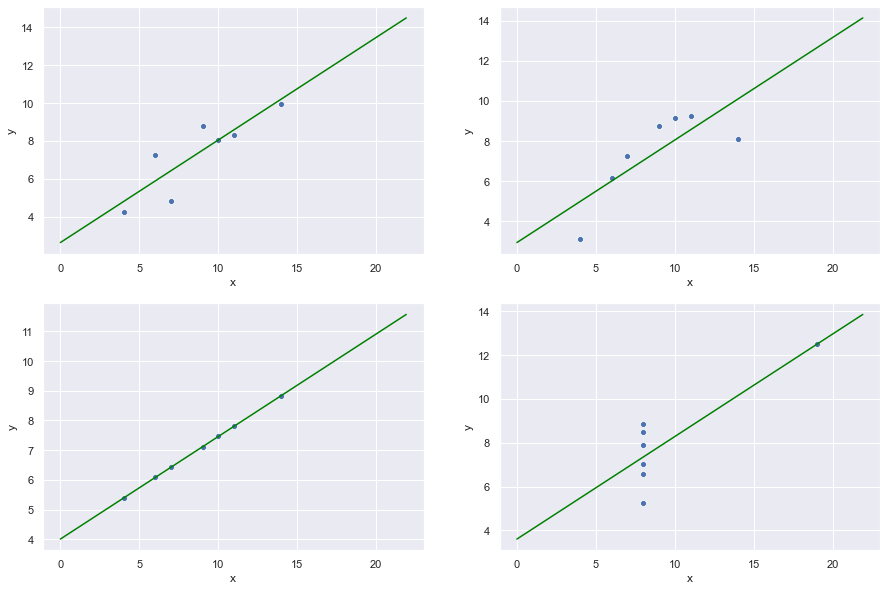

In [7]:
# graficos con seaborn grafico 1
plt.figure(figsize=(15,10))
g1=plt.subplot(2,2,1)
g2=plt.subplot(2,2,2)
g3=plt.subplot(2,2,3)
g4=plt.subplot(2,2,4)     

x_range = np.arange(0,22,0.1)
        
df_plot1 = pd.DataFrame({'x':x_range,
                        'y':[beta1_0 + beta1_1*n for n in x_range]})
  
df1 = pd.concat([X1_train,y1_train],axis=1)
        
        
        
grafico1A=sns.scatterplot(x='x', y='y', data=df1, ax=g1)
grafico1B=sns.lineplot(x='x', y='y', data=df_plot1,ax=g1,color="green")
grafico1A.set(xlabel='x',ylabel='y')
plt.xlabel('x')
plt.ylabel('y')
# graficos con seaborn grafico 2
        
    

        
df_plot2 = pd.DataFrame({'x':x_range,
                        'y':[beta2_0 + beta2_1*n for n in x_range]})
  
df2 = pd.concat([X2_train,y2_train],axis=1)
        
        
        
grafico2A=sns.scatterplot(x='x', y='y', data=df2, ax=g2)
grafico2B=sns.lineplot(x='x', y='y', data=df_plot2,ax=g2,color="green")
grafico2A.set(xlabel='x',ylabel='y')
plt.xlabel('x')
plt.ylabel('y')
# graficos con seaborn grafico 3
        
    

        
df_plot3 = pd.DataFrame({'x':x_range,
                        'y':[beta3_0 + beta3_1*n for n in x_range]})
  
df3 = pd.concat([X3_train,y3_train],axis=1)
        
        
        
grafico3A=sns.scatterplot(x='x', y='y', data=df3, ax=g3)
grafico3B=sns.lineplot(x='x', y='y', data=df_plot3,ax=g3,color="green")
grafico3A.set(xlabel='x',ylabel='y')
plt.xlabel('x')
plt.ylabel('y')
# graficos con seaborn grafico 4
        
    
df_plot4 = pd.DataFrame({'x':x_range,
                        'y':[beta4_0 + beta4_1*n for n in x_range]})


df4 = pd.concat([X4_train,y4_train],axis=1)
        
        
        
grafico4A=sns.scatterplot(x='x', y='y', data=df4, ax=g4)
grafico4B=sns.lineplot(x='x', y='y', data=df_plot4,ax=g4,color="green")
grafico4A.set(xlabel='x',ylabel='y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Parte 4

In [8]:
from metrics_regression import *
from sklearn.metrics import r2_score

# Grupo1
#Genero un dataframe con los valores de prueba con X e y
df_temp1 = pd.DataFrame(
    {
        'y':y1_test,
        'yhat': model_rl1.predict(X1_test)
        }
)
#Genero metricas a partir de mis datos de testeo con mi modelo lineal encontrado en la sección anterior
df_metrics1 = summary_metrics(df_temp1)
df_metrics1['r2'] =  round(r2_score(y1_test, model_rl1.predict(X1_test)),4)
print('\nMetricas para el regresor grupo1:\n')
print(df_metrics1)

# Grupo2
#Genero un dataframe con los valores de prueba con X e y
df_temp2 = pd.DataFrame(
    {
        'y':y2_test,
        'yhat': model_rl2.predict(X2_test)
        }
)
#Genero metricas a partir de mis datos de testeo con mi modelo lineal encontrado en la sección anterior
df_metrics2 = summary_metrics(df_temp2)
df_metrics2['r2'] =  round(r2_score(y2_test, model_rl2.predict(X2_test)),4)
print('\nMetricas para el regresor grupo2:\n')
print(df_metrics2)
# Grupo3
#Genero un dataframe con los valores de prueba con X e y
df_temp3 = pd.DataFrame(
    {
        'y':y3_test,
        'yhat': model_rl3.predict(X3_test)
        }
)
#Genero metricas a partir de mis datos de testeo con mi modelo lineal encontrado en la sección anterior
df_metrics3 = summary_metrics(df_temp3)
df_metrics3['r2'] =  round(r2_score(y3_test, model_rl3.predict(X3_test)),4)
print('\nMetricas para el regresor grupo3:\n')
print(df_metrics3)
# Grupo4
#Genero un dataframe con los valores de prueba con X e y
df_temp4 = pd.DataFrame(
    {
        'y':y4_test,
        'yhat': model_rl4.predict(X4_test)
        }
)
#Genero metricas a partir de mis datos de testeo con mi modelo lineal encontrado en la sección anterior
df_metrics4 = summary_metrics(df_temp4)
df_metrics4['r2'] =  round(r2_score(y4_test, model_rl4.predict(X4_test)),4)
print('\nMetricas para el regresor grupo4:\n')
print(df_metrics4)



Metricas para el regresor grupo1:

      mae     mse    rmse   mape  maape   wmape   mmape   smape      r2
0  1.0394  1.8547  1.3619  0.124  0.122  0.1339  0.1103  0.1195  0.4884

Metricas para el regresor grupo2:

      mae     mse    rmse    mape   maape   wmape   mmape  smape     r2
0  0.6914  0.6313  0.7945  0.0995  0.0989  0.0899  0.0863  0.098  0.791

Metricas para el regresor grupo3:

      mae    mse    rmse    mape   maape   wmape   mmape   smape      r2
0  1.0622  4.504  2.1223  0.0835  0.0806  0.1273  0.0774  0.1001  0.3717

Metricas para el regresor grupo4:

      mae     mse   rmse    mape   maape   wmape   mmape  smape      r2
0  1.0492  1.5155  1.231  0.1777  0.1734  0.1619  0.1518  0.158 -0.9902


Se puede apreciar que para cada grupo hay un indice bajo de error para cada metrica excepto par r cuadrado, el cual solo es medianamente preciso para el grupo 1, y para el resto es bastante malo al acercarse mucho al valor cero, en especial destaca el grupo 4 que tiene coeficiente r cuadrado negativo lo que nos indica que el ajuste no tiene ningun sentido respecto a los datos entregados, esto nos dice que el grupo 4 probablemente tenga otro tipo de comportamiento que no es lineal.

# Parte 5

Es claro que para el grupo 1 el ajuste es bueno ya que r cuadrado se aproxima a 1,
por otro lado para el resto de grupos se debe cambiar el modelo que se esta usando.
Grupo2: Se debe ocupar una regresion polinomica de grado 2, ya que es claro con ver los datos en el grafico que ese es su comportamiento
Grupo3: Se debe eliminar el dato anomalo que esta causando problemas.
Grupo4: Se deben invertir los ejes y eliminar el dato anomalo, para que así se tenga una buena aproximación lineal.